## Analyzing the (Small) Universe of Potential Loans to SME Agrofirms

This notebook analyzes 200 hypothetical small loans to shareholder farmers and SME agrofirms in developing countries. Most of the loans are not profit-generating; they are intended to be subsidized by donor funding or grants. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import structures_and_methods
field_converters={'Loan Number':float, 'Loan Amount (USD)':float, 'Industry':str, 'Lending Region':str, \
            'Country':str, 'Loan Additionality':str, 'Climate Change Hotspot':str,'Biodiversity Hotspot':str, \
            'Soil Degradation Hotspot':str, 'Water Scarcity Hotspot':str, 'Certification':str, \
            'Planting & maintaining trees for biodiversity conservation and carbon capture':str, \
            'Clean & appropriate tech for reduced emissions and resource efficiency':str,'Poverty Level':str, \
            'Gender Inclusion':str, 'Livelihood Improvement':str,'Farmers & Employees':float, \
            'Female Farmers & Employees':float, 'Probability of Default':float, 'Expected Revenue':float, \
            'Expected Operating Expenses':float, 'Expected Cost of Debt':float, 'Expected Cost of Risk':float, \
            'Expected Net Loan Income':float,'Female Proportion':float, 'Revenues Net Operational Expense':float}
%matplotlib inline

In [2]:
data = pd.read_csv('IFA_Assignment_Data.csv', converters=field_converters)

In [3]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

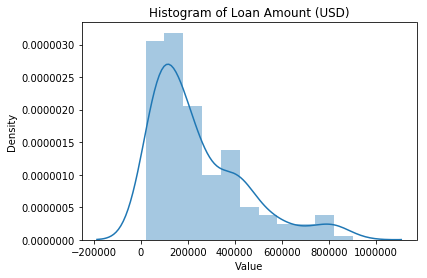

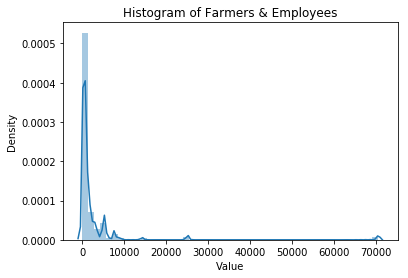

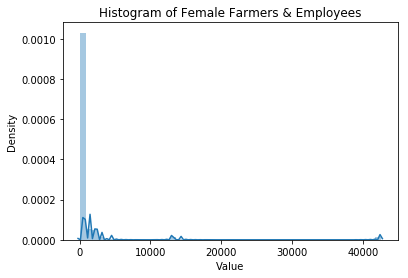

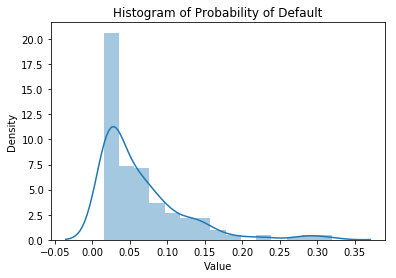

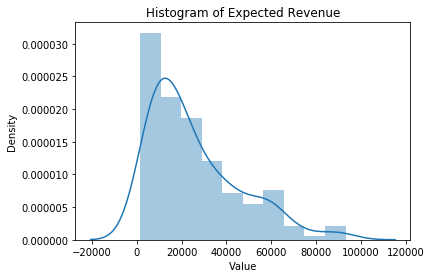

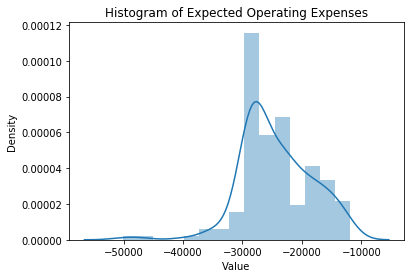

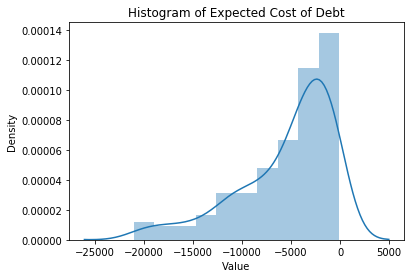

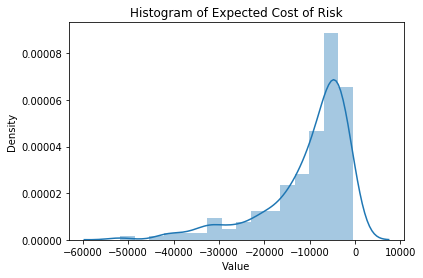

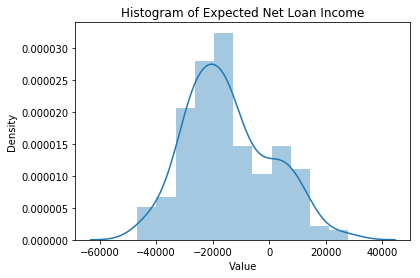

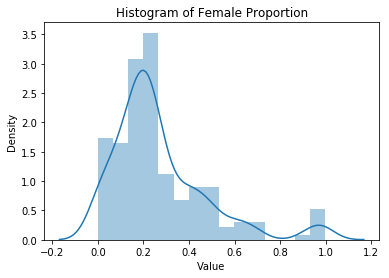

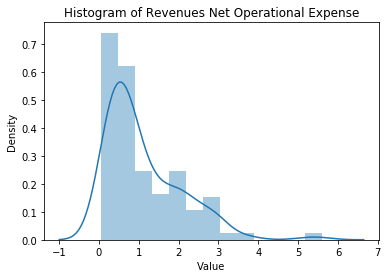

In [7]:
quant_fields = ['Loan Amount (USD)','Farmers & Employees','Female Farmers & Employees','Probability of Default', \
                'Expected Revenue','Expected Operating Expenses', 'Expected Cost of Debt','Expected Cost of Risk', \
                'Expected Net Loan Income', 'Female Proportion', 'Revenues Net Operational Expense']

for field in quant_fields:
    hist_plot(data[field], field)
    plt.show()